<a href="https://colab.research.google.com/github/Sana-Harshitha/Stock-Price-Prediction/blob/main/StockPricePrediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# List of stock tickers
tickers = ["AAPL", "MSFT", "GOOG", "TSLA", "RELIANCE.NS", "INFY.NS", "TCS.NS"]

In [ ]:
# Set the date range
start_date = "2023-01-01"
end_date = "2024-01-01"

In [ ]:
# Fetch data for each stock
all_data = []
for ticker in tickers:
    stock = yf.Ticker(ticker)
    hist = stock.history(start=start_date, end=end_date)
    hist['Ticker'] = ticker
    hist['Sector']=stock.info['sector']
    hist['Target'] = hist['Close'].shift(-1)
    all_data.append(hist)


# Concatenate all stock data into one DataFrame
df = pd.concat(all_data)
df.to_csv("multi_stock_data.csv", index=False)

In [ ]:
df.shape

(1735, 10)

In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Sector,Target
Date,,,,,,,,,,
2023-01-03 00:00:00-05:00,128.613978,129.226044,122.582112,123.470604,112117500,0.0,0.0,AAPL,Technology,124.744118
2023-01-04 00:00:00-05:00,125.267339,127.014709,123.480487,124.744118,89113600,0.0,0.0,AAPL,Technology,123.421257
2023-01-05 00:00:00-05:00,125.504275,126.136090,123.164587,123.421257,80962700,0.0,0.0,AAPL,Technology,127.962418
2023-01-06 00:00:00-05:00,124.398589,128.623848,123.292909,127.962418,87754700,0.0,0.0,AAPL,Technology,128.485641
2023-01-09 00:00:00-05:00,128.801557,131.703962,128.228972,128.485641,70790800,0.0,0.0,AAPL,Technology,129.058258
...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00+05:30,3737.113729,3782.303254,3699.742592,3760.716553,2413058,0.0,0.0,TCS.NS,Technology,3732.737793
2023-12-26 00:00:00+05:30,3756.635702,3770.551439,3727.427013,3732.737793,1285231,0.0,0.0,TCS.NS,Technology,3748.128418
2023-12-27 00:00:00+05:30,3736.130364,3755.012575,3705.643383,3748.128418,1293976,0.0,0.0,TCS.NS,Technology,3737.015625


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1735 entries, 2023-01-03 00:00:00-05:00 to 2023-12-29 00:00:00+05:30
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1735 non-null   float64
 1   High          1735 non-null   float64
 2   Low           1735 non-null   float64
 3   Close         1735 non-null   float64
 4   Volume        1735 non-null   int64  
 5   Dividends     1735 non-null   float64
 6   Stock Splits  1735 non-null   float64
 7   Ticker        1735 non-null   object 
 8   Sector        1735 non-null   object 
 9   Target        1728 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 149.1+ KB


In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
Ticker,0
Sector,0
Target,7


In [ ]:
#Dropping the rows having NaN in Taget column
df = df.dropna(subset=['Target'])

In [ ]:
df.shape

(1728, 10)

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
count,1728.000000,1728.000000,1728.000000,1728.000000,1.728000e+03,1728.000000,1728.0,1728.000000
mean,942.075409,949.774842,934.089303,942.204968,3.912706e+07,0.088391,0.0,942.892140
std,1070.739879,1078.574305,1062.754154,1070.936279,4.699693e+07,1.843025,0.0,1071.651245
min,86.311188,87.794161,85.166606,86.360947,7.095470e+05,0.000000,0.0,86.360947
25%,175.618373,177.878808,174.453430,176.044685,6.946912e+06,0.000000,0.0,176.168655
50%,317.144004,321.051636,315.139711,317.419922,2.118370e+07,0.000000,0.0,317.583115
75%,1296.104151,1306.829674,1286.921437,1297.130005,5.104122e+07,0.000000,0.0,1297.130005
max,3794.252332,3863.978911,3766.764685,3797.104248,3.065906e+08,67.000000,0.0,3797.104248


In [ ]:
df['Ticker'].value_counts()

,count
Ticker,
AAPL,249
MSFT,249
GOOG,249
TSLA,249
RELIANCE.NS,244
INFY.NS,244
TCS.NS,244


In [ ]:
df['Sector'].value_counts()

,count
Sector,
Technology,986
Communication Services,249
Consumer Cyclical,249
Energy,244


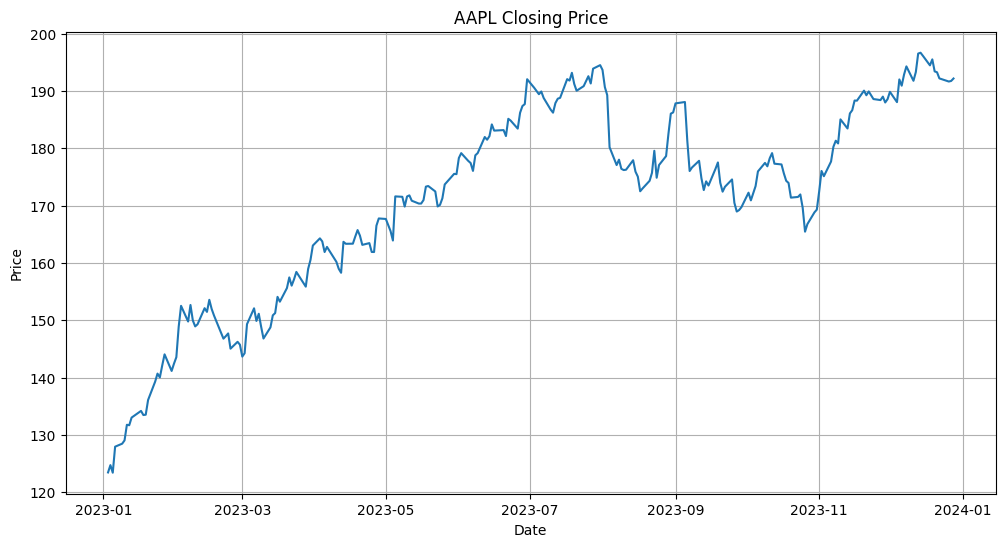

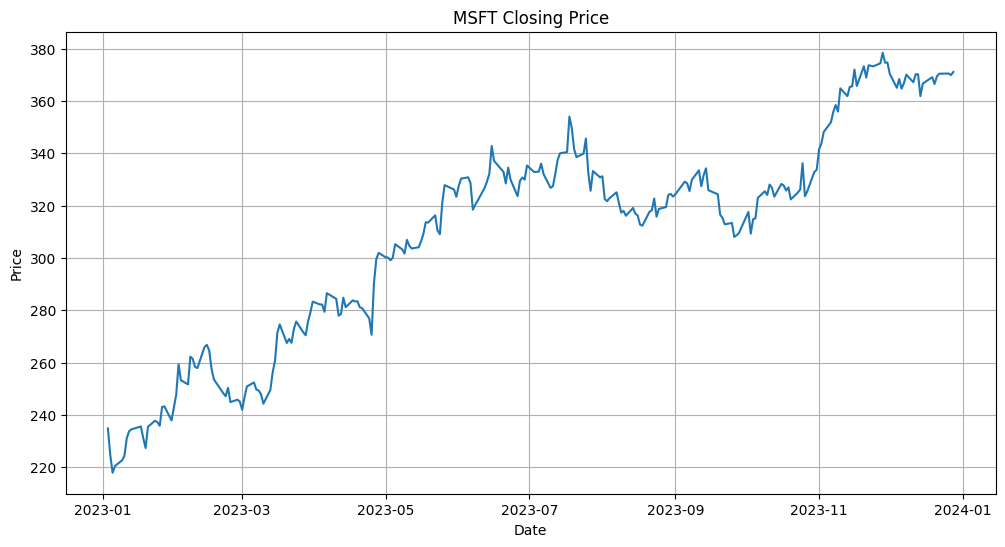

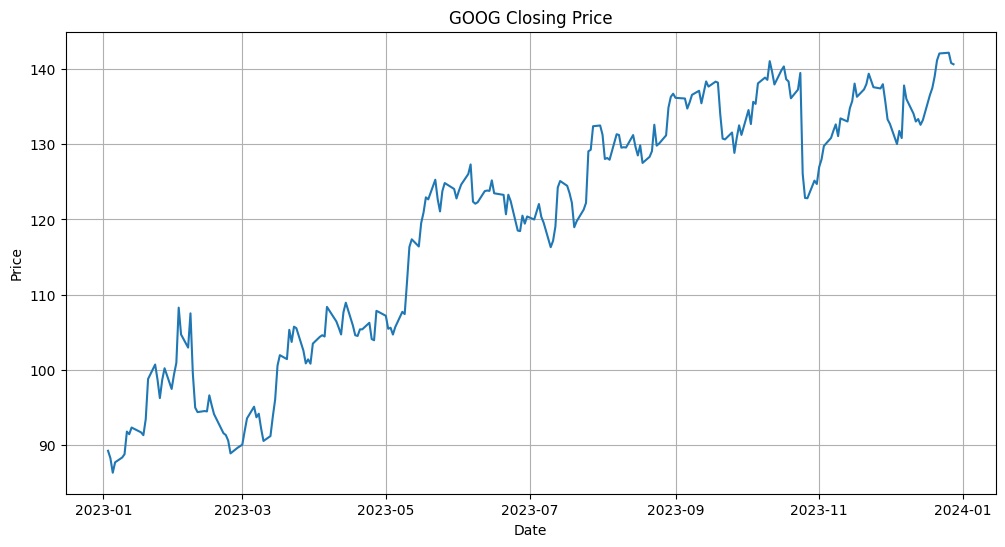

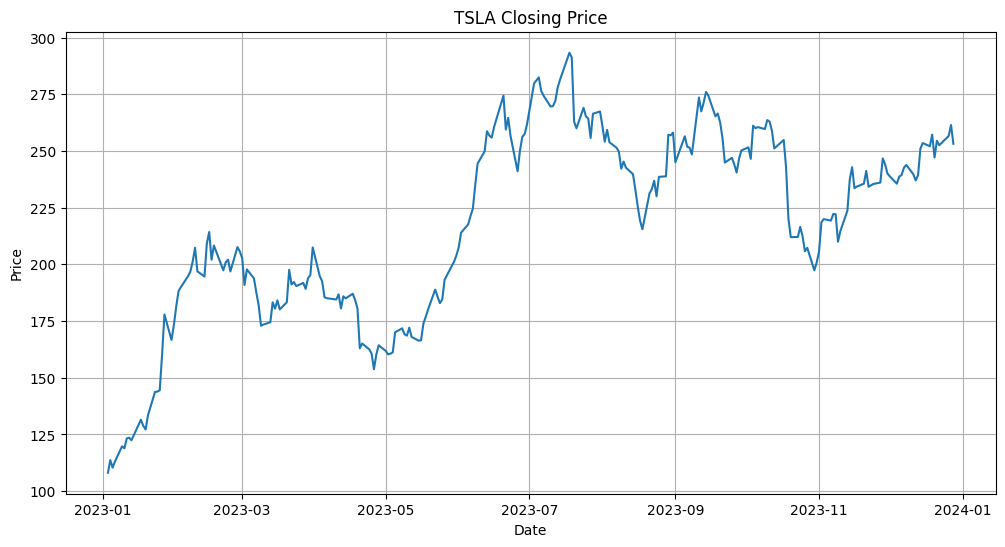

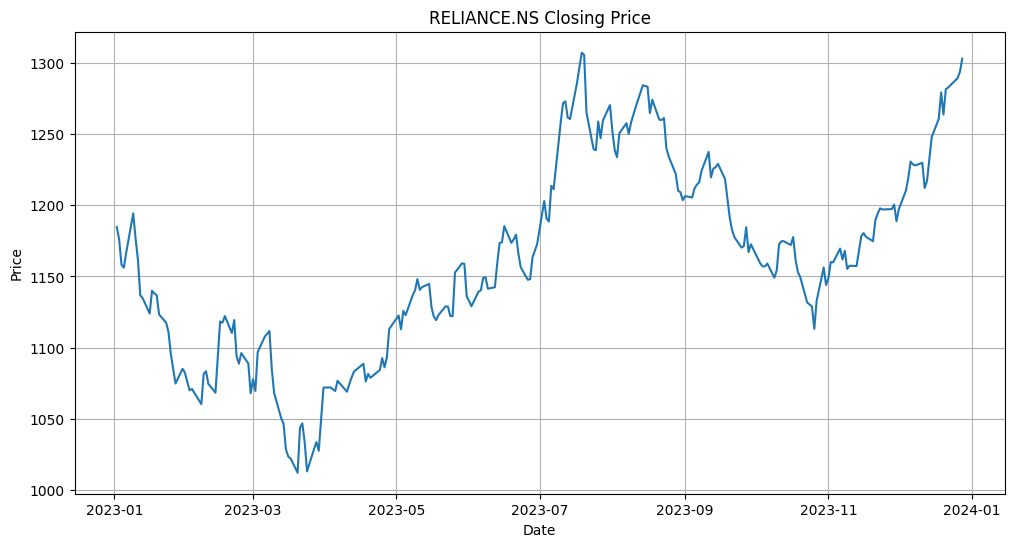

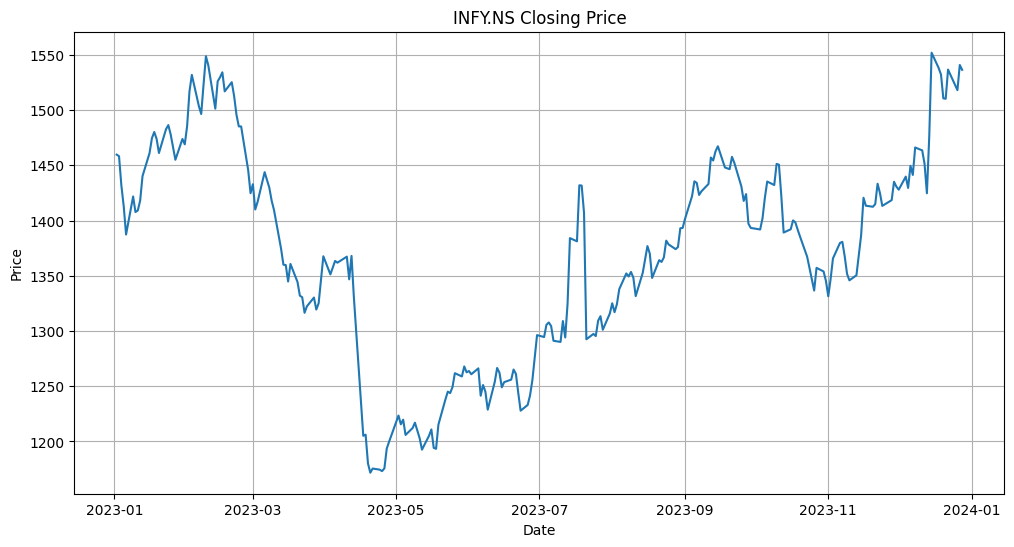

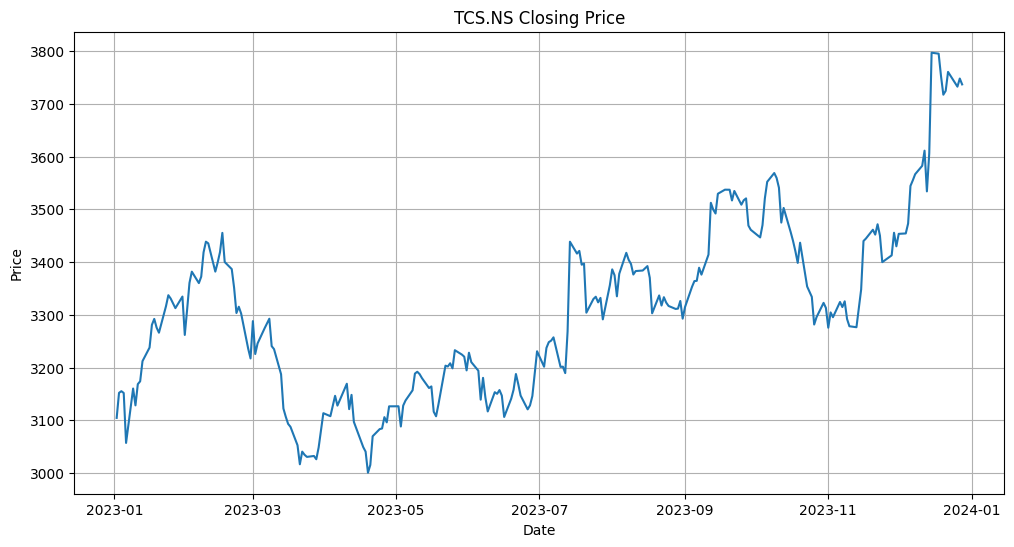

In [ ]:
for ticker in tickers:
    df_ticker = df[df['Ticker'] == ticker]
    plt.figure(figsize=(12, 6))
    plt.plot(df_ticker.index, df_ticker['Close'])
    plt.title(f"{ticker} Closing Price")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid()
    plt.show()



<Axes: >

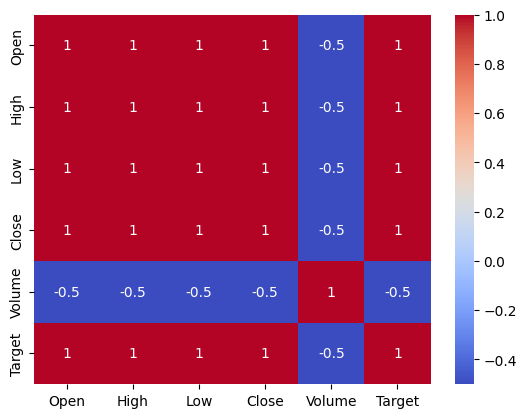

In [ ]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Target']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')

In [ ]:
data = df[['Close']]
data.dropna(inplace=True)

<ipython-input-16-14185fc3496f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [ ]:
data

,Close
Date,
2023-01-03 00:00:00-05:00,123.470604
2023-01-04 00:00:00-05:00,124.744118
2023-01-05 00:00:00-05:00,123.421257
2023-01-06 00:00:00-05:00,127.962418
2023-01-09 00:00:00-05:00,128.485641
...,...
2023-12-21 00:00:00+05:30,3724.820801
2023-12-22 00:00:00+05:30,3760.716553
2023-12-26 00:00:00+05:30,3732.737793


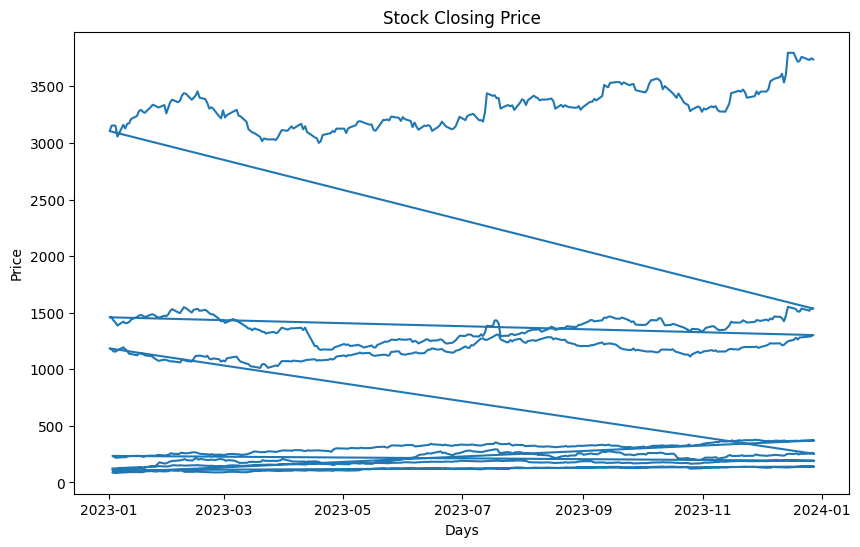

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.title("Stock Closing Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

Creating Sequences

In [ ]:
def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(scaled_data, window_size)

# Reshaping to 3D for LSTM: [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

Creating the model

In [ ]:
model = Sequential([
    LSTM(60, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(60),
    Dropout(0.2),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[callback])


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0063 - val_loss: 0.0042
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.4446e-04 - val_loss: 0.0035
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.2401e-04 - val_loss: 0.0035
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.3945e-04 - val_loss: 0.0047
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8475e-04 - val_loss: 0.0039
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.2652e-04 - val_loss: 0.0044
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9850e-04 - val_loss: 0.0059
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.7568e-04 - val_loss: 0.0052


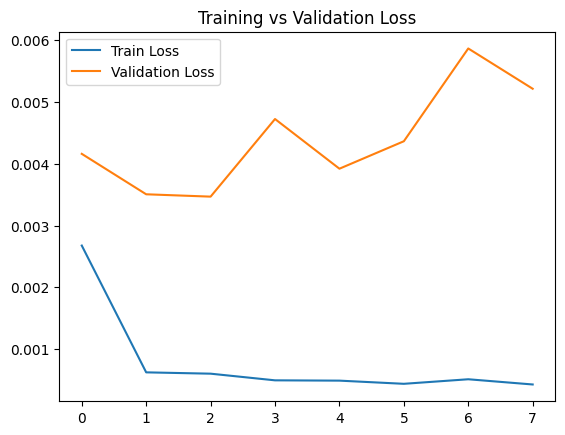

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [ ]:

predicted = model.predict(X_test)

# Inverse transform to get original price scale
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


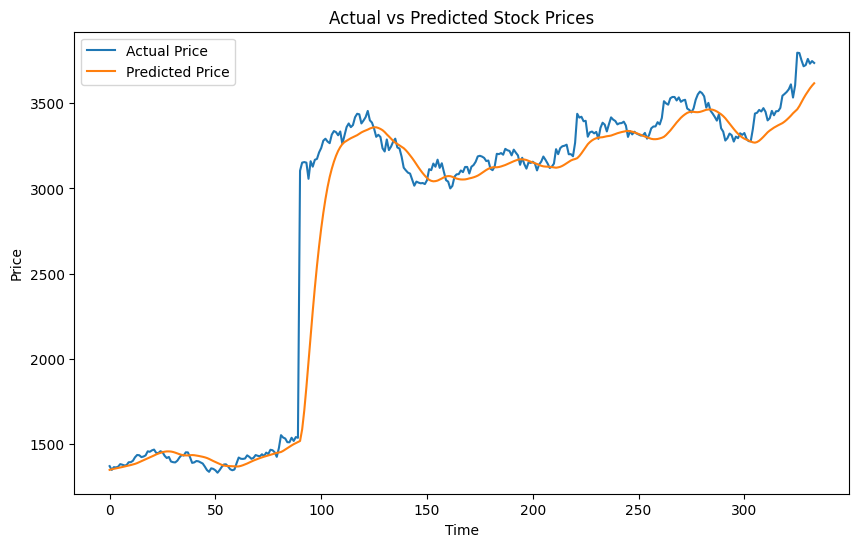

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 218.53
MAE: 98.30


In [ ]:
model.save("lstm_stock_model.h5")